<a href="https://colab.research.google.com/github/Morteza-Kabiri/Learning-Create-Machine-Learning-Models/blob/main/Logestic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

*Supervised* machine learning techniques involve training a model to operate on a set of *features* and predict a *label* using a dataset that includes some already-known label values. You can think of this function like this, in which ***y*** represents the label we want to predict and ***X*** represents the vector of features the model uses to predict it.

$$y = f([x_1, x_2, x_3, ...])$$


*Classification* is a form of supervised machine learning in which you train a model to use the features (the ***x*** values in our function) to predict a label (***y***) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. The simplest form of classification is *binary* classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False", "Internal" or "External", "Profitable" or "Non-Profitable", and so on.

## Binary Classification

In this notebook, we'll focus on an example of *binary classification*, where the model must predict a label that belongs to one of two classes. We'll train a binary classifier to predict whether or not a patient should be tested for diabetes based on their medical data.

### Explore the data

Run the following cell to load a CSV file of patent data into a **Pandas** dataframe.

> **Citation**: The diabetes dataset used in this exercise is based on data originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases.

In [ ]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

--2023-12-04 06:02:31--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>] 758.22K  --.-KB/s    in 0.03s   

2023-12-04 06:02:32 (21.4 MB/s) - ‘diabetes.csv’ saved [776415/776415]



,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


This data consists of diagnostic information about some patients who have been tested for diabetes. Scroll to the right if necessary, and note that the final column in the dataset (**Diabetic**) contains the value ***0*** for patients who tested negative for diabetes, and ***1*** for patients who tested positive. This is the label that we will train our model to predict; most of the other columns (**Pregnancies**, **PlasmaGlucose**, **DiastolicBloodPressure**, and so on) are the features we will use to predict the **Diabetic** label.

Let's separate the features from the labels - we'll call the features ***X*** and the label ***y***:

In [ ]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1
Patient 5 
  Features: [1.0, 85.0, 59.0, 27.0, 35.0, 42.60453585, 0.549541871, 22.0] 
  Label: 0


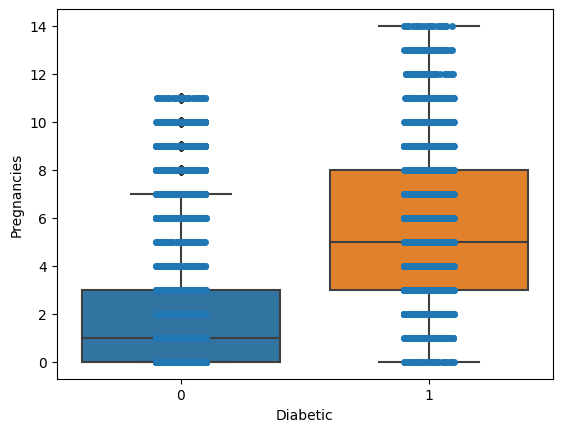

In [ ]:
# import matplotlib as plt
# import seaborn as sns

# ax = sns.boxplot(x='Diabetic', y='Pregnancies', data=diabetes)
# ax = sns.stripplot(x="Diabetic", y="Pregnancies",data=diabetes)


Now let's compare the feature distributions for each label value.

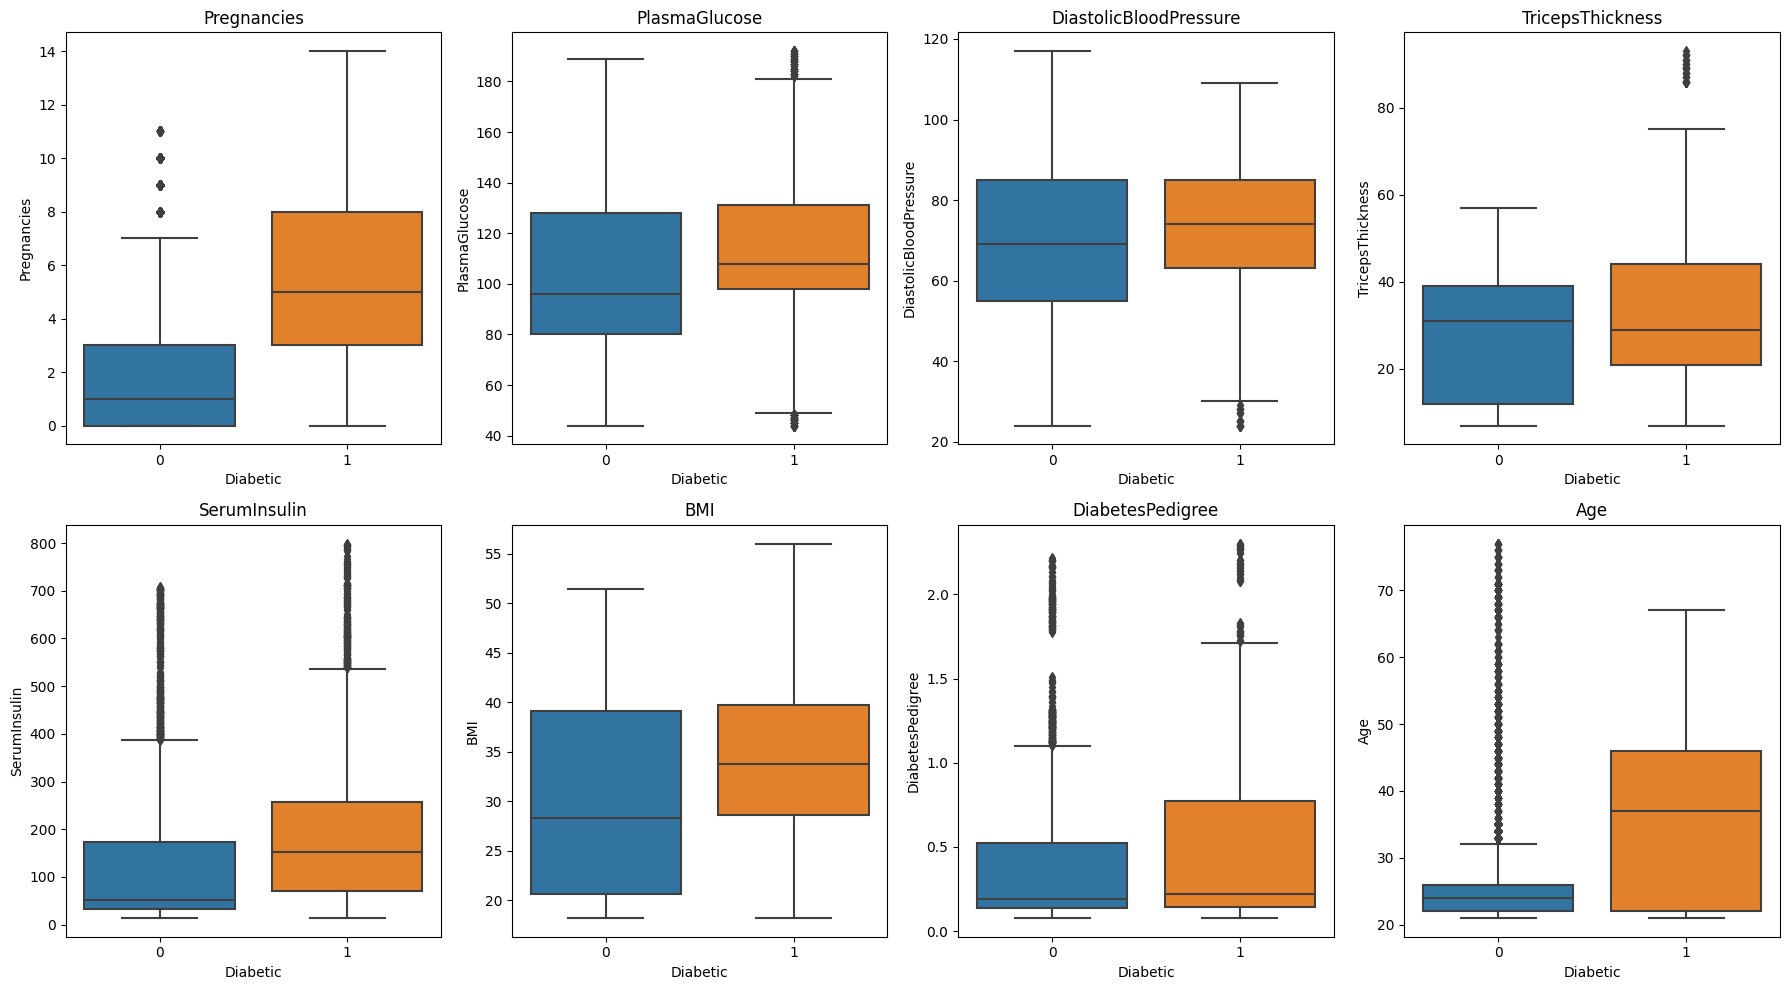

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'diabetes'
# and 'Diabetic' column contains the labels (0 for non-diabetic, 1 for diabetic)

features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through features and create boxplots
for i, col in enumerate(features):
    # Boxplot
    sns.boxplot(x='Diabetic', y=col, data=diabetes, ax=axes[i])

    # Set title
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


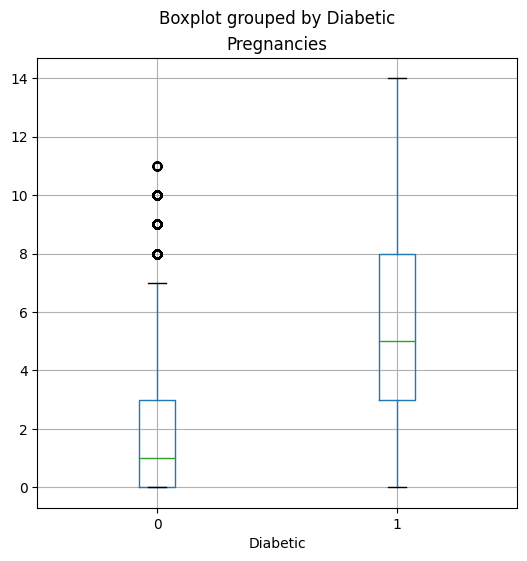

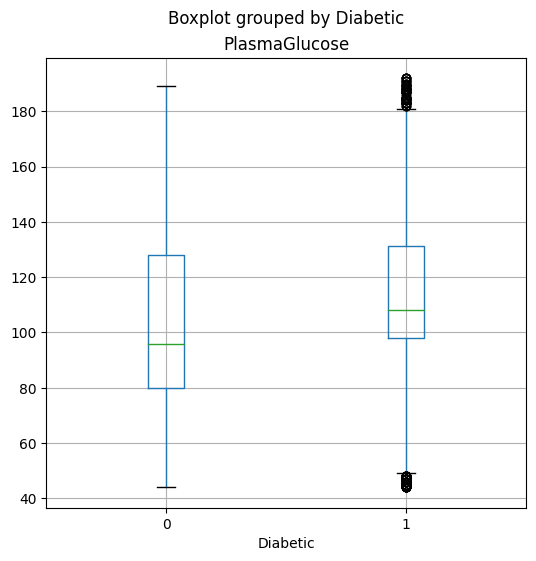

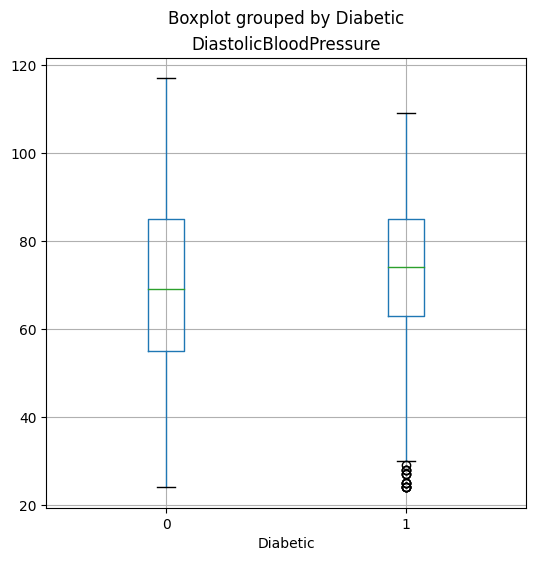

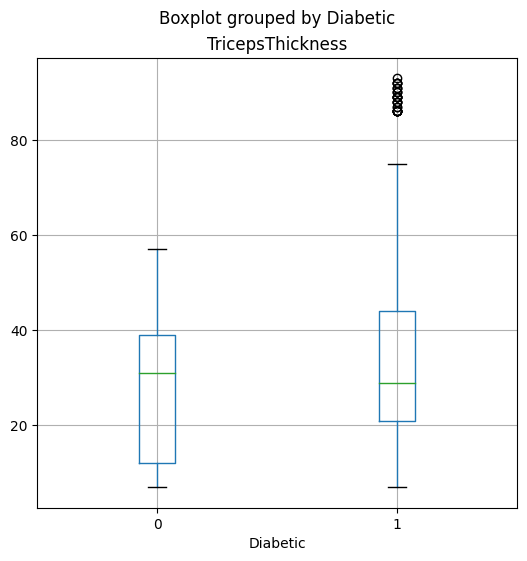

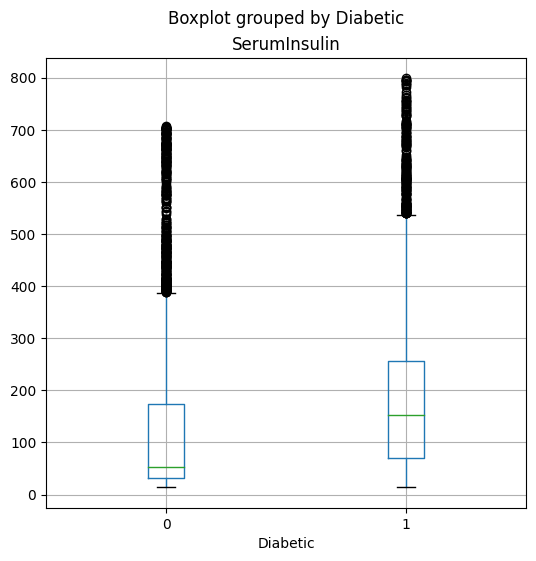

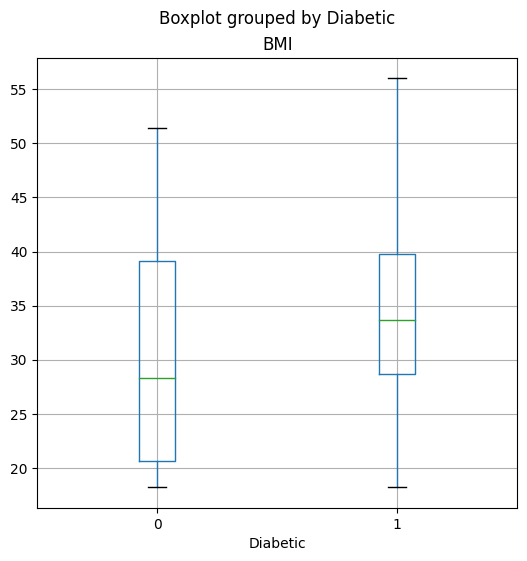

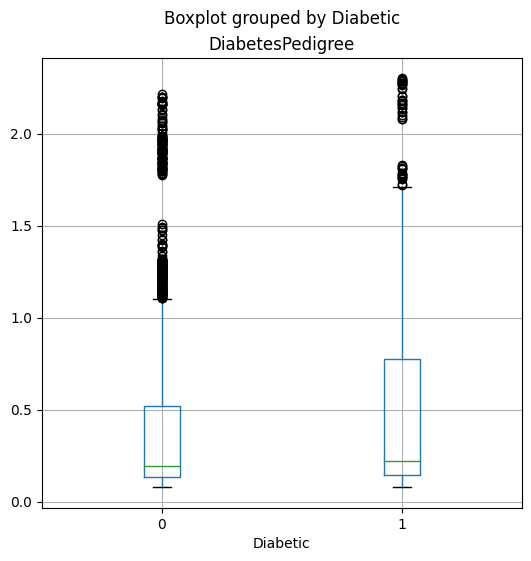

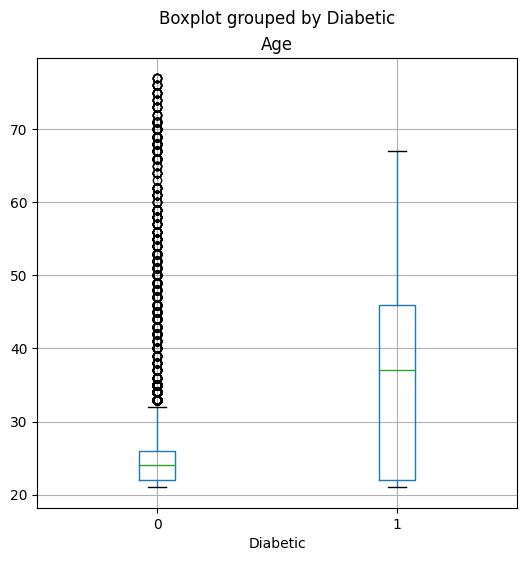

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

For some of the features, there's a noticeable difference in the distribution for each label value. In particular, **Pregnancies** and **Age** show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

### Split the data

Our dataset includes known values for the label, so we can use this to train a classifier so that it finds a statistical relationship between the features and the label value - but how will we know if our model is any good? How do we know it will predict correctly when we use it with new data that it wasn't trained with? Well, we can take advantage of the fact we have a large dataset with known label values, use only some of it to train the model, and hold back some to test the trained model - enabling us to compare the predicted labels with the already known labels in the test set.

In Python, the **scikit-learn** package contains a large number of functions we can use to build a machine learning model - including a **train_test_split** function that ensures we get a statistically random split of training and test data. We'll use that to split the data into 70% for training and hold back 30% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


### Train and Evaluate a Binary Classification Model
We're now ready to train our model by fitting the training features (**X_train**) to the training labels (**y_train**). There are various algorithms we can use to train the model. In this example, we'll use *Logistic Regression*, which (despite its name) is a well-established algorithm for classification. In addition to the training features and labels, we'll need to set a *regularization* parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding *overfitting* the model to the training data.

> **Note**: Parameters for machine learning algorithms are generally referred to as *hyperparameters*. To a data scientist, *parameters* are values in the data itself - *hyperparameters* are defined externally from the data.

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Best Hyperparameters: {'C': 1.0, 'penalty': 'l1'}


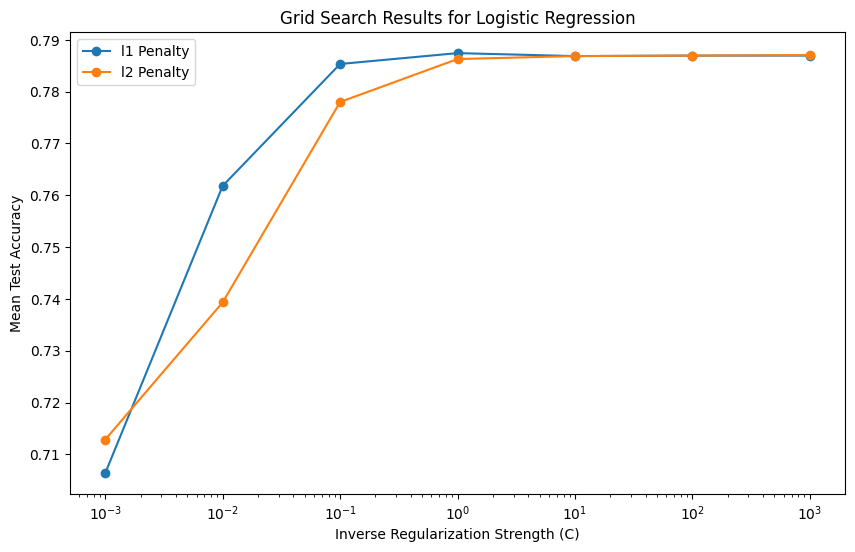

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Assuming X_train, y_train, X_test, y_test are your training and testing datasets

# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Values of C from 0.001 to 1000 in a log scale
    'penalty': ['l1', 'l2'],      # Regularization types: l1 (Lasso) and l2 (Ridge)
}

# Create a logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Plot the results
results = grid_search.cv_results_
Cs = np.logspace(-3, 3, 7)
accuracy_l1 = results['mean_test_score'][::2]  # Accuracy values for l1 penalty
accuracy_l2 = results['mean_test_score'][1::2]  # Accuracy values for l2 penalty

plt.figure(figsize=(10, 6))
plt.plot(Cs, accuracy_l1, marker='o', label='l1 Penalty')
plt.plot(Cs, accuracy_l2, marker='o', label='l2 Penalty')
plt.xscale('log')
plt.xlabel('Inverse Regularization Strength (C)')
plt.ylabel('Mean Test Accuracy')
plt.title('Grid Search Results for Logistic Regression')
plt.legend()
plt.show()


Now that we've trained the model using the training data, we can use the test data we held back to evaluate how well it predicts. Again, **scikit-learn** can help us do this. Let's start by using the model to predict labels for our test set, and compare the predicted labels to the known labels:

In [ ]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ', y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


The arrays of labels are too long to be displayed in the notebook output, so we can only compare a few values. Even if we printed out all of the predicted and actual labels, there are too many of them to make this a sensible way to evaluate the model. Fortunately, **scikit-learn** has a few more tricks up its sleeve, and it provides some metrics that we can use to evaluate the model.

The first thing you might want to do is to check the *accuracy* of the predictions - that is, what proportion of the labels did the model predict correctly?

<ipython-input-26-4dfecf62be07>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value}, ignore_index=True)
<ipython-input-26-4dfecf62be07>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value}, ignore_index=True)
<ipython-input-26-4dfecf62be07>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value}, ignore_index=True)
<ipython-input-26-4dfecf62be07>:18: FutureWarning: The frame.append method is deprecated and will be re

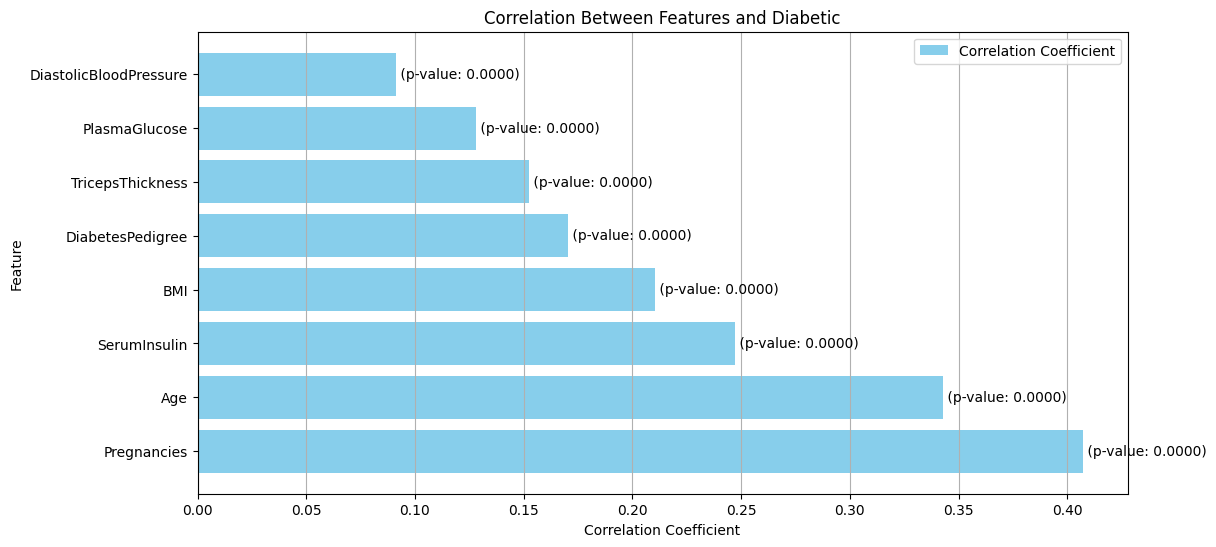

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming you have a DataFrame named 'diabetes'
# and 'Diabetic' column contains the labels (0 for non-diabetic, 1 for diabetic)

# Extract features and target variable
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
target_variable = 'Diabetic'

# Create an empty DataFrame to store correlation coefficients and p-values
correlation_df = pd.DataFrame(columns=['Feature', 'Correlation', 'P-Value'])

# Calculate correlation coefficients and p-values
for feature in features:
    correlation, p_value = pearsonr(diabetes[feature], diabetes[target_variable])
    correlation_df = correlation_df.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value}, ignore_index=True)

# Sort the DataFrame by absolute correlation values
correlation_df = correlation_df.sort_values(by='Correlation', key=lambda x: abs(x), ascending=False)

# Plotting both Correlation Coefficient and P-Value
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting Correlation Coefficient
ax.barh(correlation_df['Feature'], correlation_df['Correlation'], color='skyblue', label='Correlation Coefficient')

# Adding P-Values as text annotations
for i, (corr, p_value) in enumerate(zip(correlation_df['Correlation'], correlation_df['P-Value'])):
    ax.text(corr, i, f' (p-value: {p_value:.4f})', va='center', fontsize=10)

ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Feature')
ax.set_title('Correlation Between Features and Diabetic')
ax.grid(axis='x')
ax.legend()
plt.show()


In [ ]:
from scipy.stats import ttest_1samp

# Example: One-Sample T-Test comparing mean of 'PlasmaGlucose' for Diabetic group to a hypothetical mean
hypothetical_mean = 100  # Replace with your value
statistic, p_value = ttest_1samp(diabetes[diabetes['Diabetic'] == 1]['PlasmaGlucose'], hypothetical_mean)

print(f"Statistic: {statistic}, p-value: {p_value}")


Statistic: 31.13201835128432, p-value: 1.2138886851359393e-194


In [ ]:
from scipy.stats import ttest_ind

# Example: Independent Samples T-Test comparing mean of 'PlasmaGlucose' for Diabetic vs. Non-Diabetic
statistic, p_value = ttest_ind(diabetes[diabetes['Diabetic'] == 1]['PlasmaGlucose'],
                                diabetes[diabetes['Diabetic'] == 0]['PlasmaGlucose'])

print(f"Statistic: {statistic}, p-value: {p_value}")


Statistic: 15.806177531442552, p-value: 7.958582016616854e-56


In [ ]:
from scipy.stats import mannwhitneyu

# Example: Mann-Whitney U Test comparing 'PlasmaGlucose' for Diabetic vs. Non-Diabetic
statistic, p_value = mannwhitneyu(diabetes[diabetes['Diabetic'] == 1]['PlasmaGlucose'],
                                   diabetes[diabetes['Diabetic'] == 0]['PlasmaGlucose'])

print(f"Statistic: {statistic}, p-value: {p_value}")


Statistic: 29429333.5, p-value: 3.0669399800179323e-70


In [ ]:
# Interpretation:
# Null Hypothesis (H0): There is no significant difference between the groups.

# Alternative Hypothesis (H1): There is a significant difference between the groups.

# If the p-value is below your chosen significance level (commonly 0.05), you reject the null hypothesis, indicating a significant difference.

# If the p-value is above your significance level, you fail to reject the null hypothesis.

# Repeat these tests for each relevant feature. A low p-value suggests that the feature is likely associated with diabetes.

# Remember to adjust for multiple testing if you are conducting many tests simultaneously to control the family-wise error rate. Techniques like Bonferroni correction or False Discovery Rate (FDR) adjustment can be applied.

<ipython-input-25-e56ac601a7e2>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value}, ignore_index=True)
<ipython-input-25-e56ac601a7e2>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value}, ignore_index=True)
<ipython-input-25-e56ac601a7e2>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value}, ignore_index=True)
<ipython-input-25-e56ac601a7e2>:18: FutureWarning: The frame.append method is deprecated and will be re

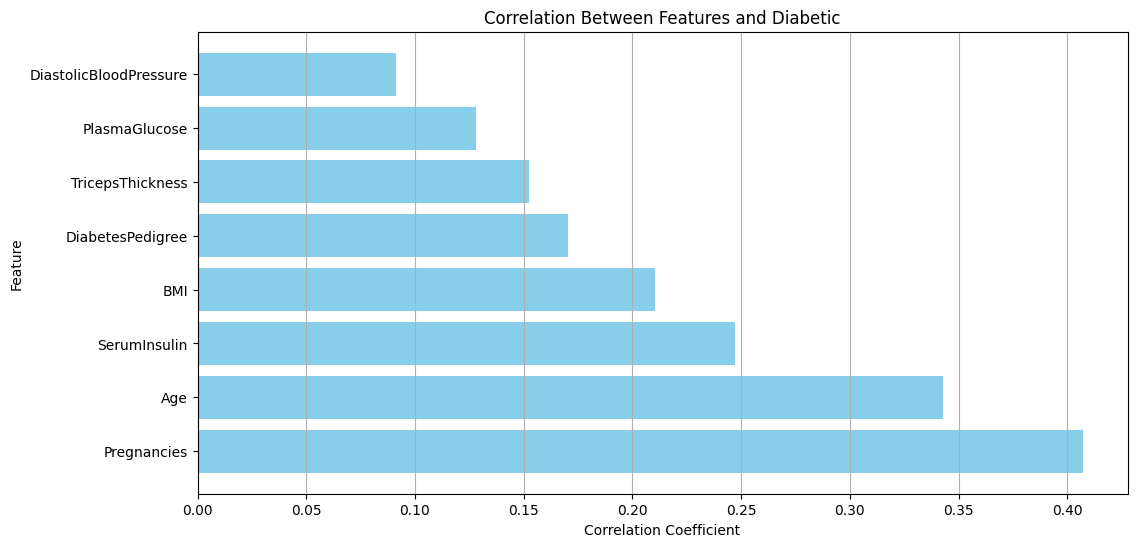

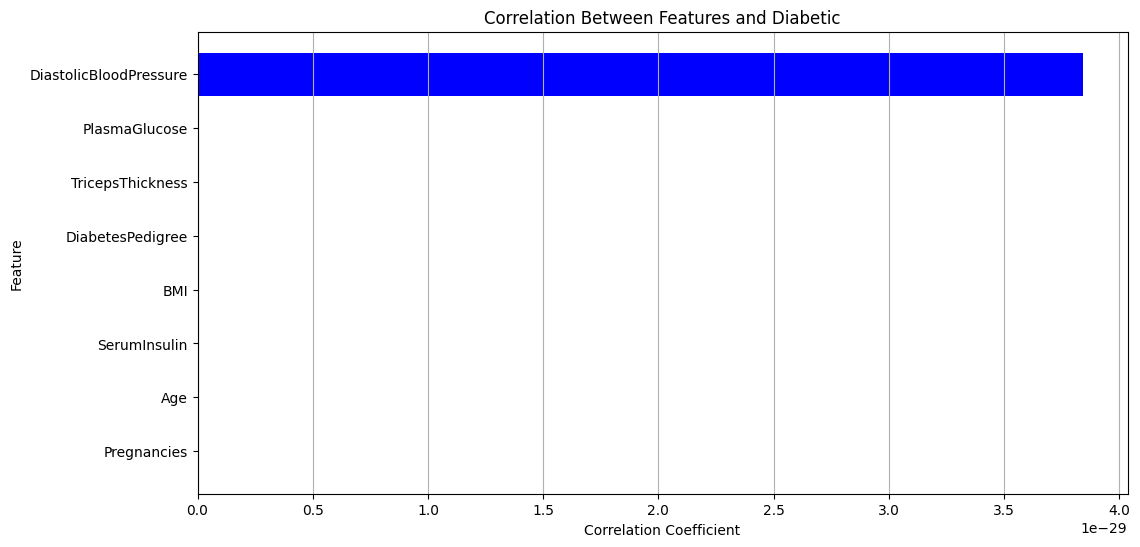

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming you have a DataFrame named 'diabetes'
# and 'Diabetic' column contains the labels (0 for non-diabetic, 1 for diabetic)

# Extract features and target variable
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
target_variable = 'Diabetic'

# Create an empty DataFrame to store correlation coefficients and p-values
correlation_df = pd.DataFrame(columns=['Feature', 'Correlation', 'P-Value'])

# Calculate correlation coefficients and p-values
for feature in features:
    correlation, p_value = pearsonr(diabetes[feature], diabetes[target_variable])
    correlation_df = correlation_df.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value}, ignore_index=True)

# Sort the DataFrame by absolute correlation values
correlation_df = correlation_df.sort_values(by='Correlation', key=lambda x: abs(x), ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.title('Correlation Between Features and Diabetic')
plt.grid(axis='x')
plt.show()
#-----------------------------
plt.figure(figsize=(12, 6))
plt.barh(correlation_df['Feature'], correlation_df['P-Value'], color='blue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.title('Correlation Between Features and Diabetic')
plt.grid(axis='x')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7888888888888889


The accuracy is returned as a decimal value - a value of 1.0 would mean that the model got 100% of the predictions right, while an accuracy of 0.0 is, well, pretty useless!


## Summary

Here we prepared our data by splitting it into test and train datasets, and applied logistic regression - a way of applying binary labels to our data. Our model was able to predict whether patients had diabetes with what appears to be reasonable accuracy. But is this good enough? In the next notebook we will look at alternatives to accuracy that can be much more useful in machine learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

# Separate features and labels
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Values of C from 0.001 to 1000 in a log scale
    'penalty': ['l1', 'l2'],      # Regularization types: l1 (Lasso) and l2 (Ridge)
}

# Create a logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model using the best hyperparameters
best_logreg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear').fit(X_train, y_train)

# Predictions on the test set
predictions = best_logreg.predict(X_test)
print('Predicted labels on test set: ', predictions)
print('Actual labels on test set:    ', y_test)
print('Accuracy on test set: ', accuracy_score(y_test, predictions))

# Generate new data for prediction (replace this with your actual new data)
new_data = np.array([[2, 120, 80, 25, 150, 25, 0.5, 30]])  # Example new data

# Make predictions on new data
new_predictions = best_logreg.predict(new_data)
print('Predicted label for new data: ', new_predictions)


--2023-12-05 10:14:49--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>] 758.22K  --.-KB/s    in 0.02s   

2023-12-05 10:14:49 (35.7 MB/s) - ‘diabetes.csv’ saved [776415/776415]

Training cases: 10500
Test cases: 4500
Best Hyperparameters: {'C': 1.0, 'penalty': 'l1'}
Predicted labels on test set:  [0 0 0 ... 0 1 0]
Actual labels on test set:     [0 0 1 ... 1 1 1]
Accuracy on test set:  0.7891111111111111
Predicted label for new data:  [0]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

# Separate features and labels
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Values of C from 0.001 to 1000 in a log scale
    'penalty': ['l1', 'l2'],      # Regularization types: l1 (Lasso) and l2 (Ridge)
}

# Create a logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model using the best hyperparameters
best_logreg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear').fit(X_train, y_train)

# Predictions on the test set
predictions_test = best_logreg.predict(X_test)
print('Accuracy on test set: ', accuracy_score(y_test, predictions_test))

# Read new data from new_data.csv
new_data = pd.read_csv('new_data.csv')

# Make predictions on new data
new_predictions = best_logreg.predict(new_data[features])

# Create a DataFrame with predictions for each row
result_df = pd.DataFrame({'Prediction': new_predictions})

# Display the DataFrame with predictions
print(result_df)

# Write the DataFrame with predictions back to the CSV file
result_df.to_csv('new_data_predictions.csv', index=False)


--2023-12-05 11:18:47--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>] 758.22K  --.-KB/s    in 0.02s   

2023-12-05 11:18:48 (36.6 MB/s) - ‘diabetes.csv.1’ saved [776415/776415]

Training cases: 10500
Test cases: 4500
Best Hyperparameters: {'C': 1.0, 'penalty': 'l1'}
Accuracy on test set:  0.7891111111111111
    Prediction
0            0
1            1
2            1
3            0
4            0
5            1
6            1
7            1
8            0
9            1
10           1
11           0
12           1
13           1
14    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

# Separate features and labels
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Values of C from 0.001 to 1000 in a log scale
    'penalty': ['l1', 'l2'],      # Regularization types: l1 (Lasso) and l2 (Ridge)
}

# Create a logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model using the best hyperparameters
best_logreg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear').fit(X_train, y_train)

# Predictions on the test set
predictions_test = best_logreg.predict(X_test)
print('Accuracy on test set: ', accuracy_score(y_test, predictions_test))

# Read new data from new_data.csv
new_data = pd.read_csv('new_data.csv')

# Make predictions on new data
new_predictions = best_logreg.predict(new_data[features])

# Add a new column "Diabetic" with predictions to the existing DataFrame
new_data['Diabetic'] = new_predictions

# Display the DataFrame with predictions
print(new_data)

# Write the DataFrame with predictions back to the CSV file
new_data.to_csv('new_data.csv', index=False)


--2023-12-05 11:25:47--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv.2’

diabetes.csv.2      100%[===================>] 758.22K  --.-KB/s    in 0.02s   

2023-12-05 11:25:47 (37.8 MB/s) - ‘diabetes.csv.2’ saved [776415/776415]

Training cases: 10500
Test cases: 4500
Best Hyperparameters: {'C': 1.0, 'penalty': 'l1'}
Accuracy on test set:  0.7891111111111111
    PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0     1354778            0            171                      80   
1     7840923            7            126                     103   
2     8988601           

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


--2023-12-06 09:11:31--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv.11’

diabetes.csv.11     100%[===================>] 758.22K  --.-KB/s    in 0.05s   

2023-12-06 09:11:31 (13.5 MB/s) - ‘diabetes.csv.11’ saved [776415/776415]

Training cases: 10500
Test cases: 4500
Best Hyperparameters: {'C': 1.0, 'penalty': 'l1'}
Accuracy on test set:  0.7891111111111111
Confusion Matrix:
[[2638  348]
 [ 601  913]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      151

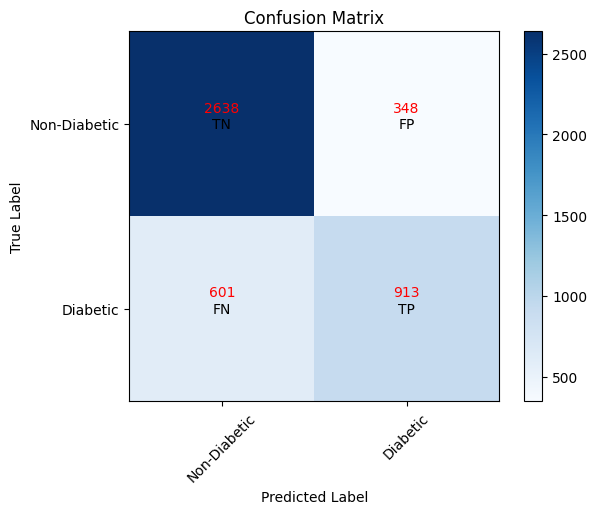

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

# Separate features and labels
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Values of C from 0.001 to 1000 in a log scale
    'penalty': ['l1', 'l2'],      # Regularization types: l1 (Lasso) and l2 (Ridge)
}

# Create a logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model using the best hyperparameters
best_logreg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear').fit(X_train, y_train)

# Predictions on the test set
predictions_test = best_logreg.predict(X_test)
print('Accuracy on test set: ', accuracy_score(y_test, predictions_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_test)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions_test))

# Visualize Confusion Matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Non-Diabetic', 'Diabetic']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
labels = [['TN', 'FP'], ['FN', 'TP']]

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j])+'\n\n', ha='center', va='center', color='red')
        plt.text(j, i, labels[i][j], ha='center', va='center', color='black')
# Here are some commonly used values for ha:

# 'center' (default): Center the text horizontally at the specified (x, y) coordinates.

# 'right': Align the right edge of the text with the (x, y) coordinates.

# 'left': Align the left edge of the text with the (x, y) coordinates.

# 'center_baseline': Center the text horizontally, but align the text's baseline with the (x, y) coordinates.

# For vertical alignment (va), the commonly used values are:

# 'center' (default): Center the text vertically at the specified (x, y) coordinates.

# 'top': Align the top of the text with the (x, y) coordinates.

# 'bottom': Align the bottom of the text with the (x, y) coordinates.

# 'center_baseline': Center the text vertically, but align the text's baseline with the (x, y) coordinates.


plt.show()


In [ ]:
# Precision, Recall, F1 Score:

from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
precision = precision_score(y_test, predictions_test)
print("Precision: {:.4f}".format(precision))

# Recall
recall = recall_score(y_test, predictions_test)
print("Recall: {:.4f}".format(recall))

# F1 Score
f1 = f1_score(y_test, predictions_test)
print("F1 Score: {:.4f}".format(f1))


Precision: 0.7237
Recall: 0.6037
F1 Score: 0.6583


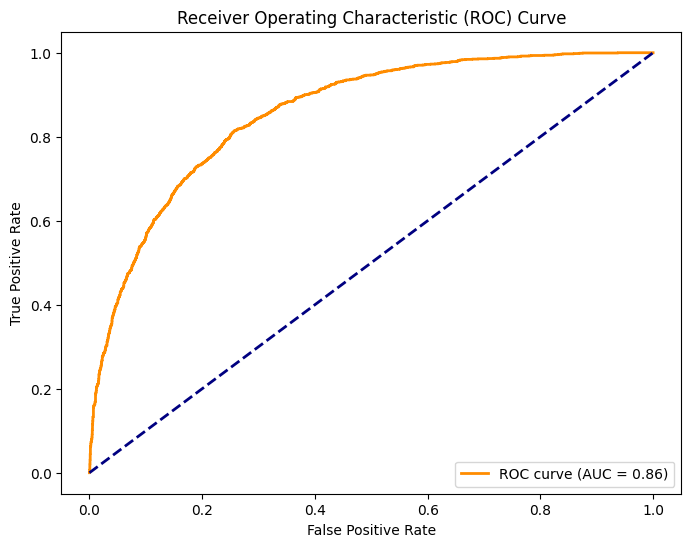

In [ ]:
# ROC Curve and AUC:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_logreg.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


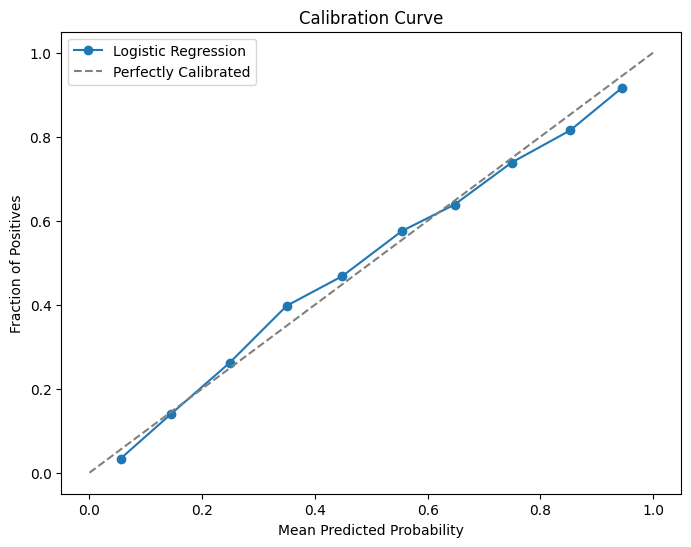

In [ ]:
# Calibration Curve:
from sklearn.calibration import calibration_curve

# Generate calibration curve
prob_true, prob_pred = calibration_curve(y_test, best_logreg.predict_proba(X_test)[:, 1], n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


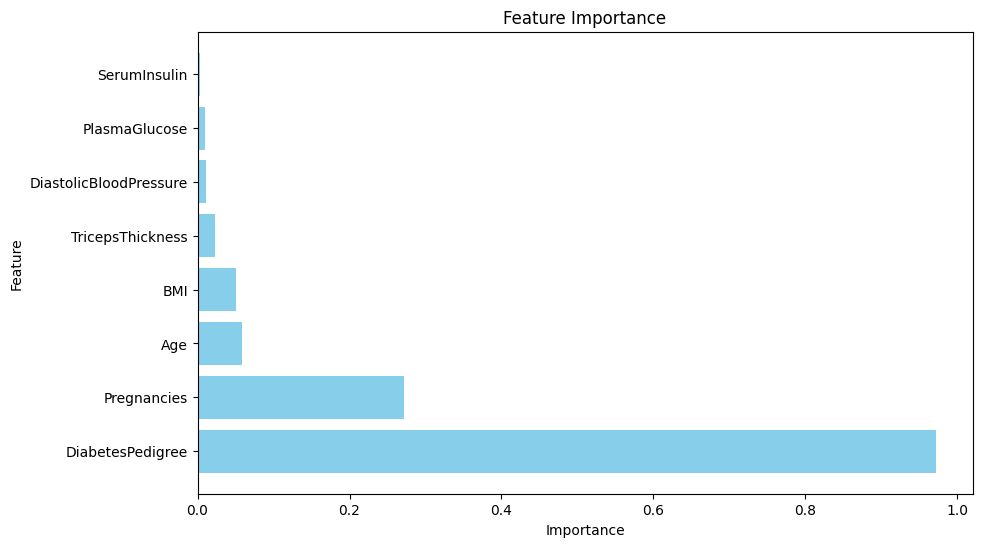

In [ ]:
# Feature Importance:

# Extract feature importance
feature_importance = best_logreg.coef_[0]

# Create DataFrame for feature names and importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


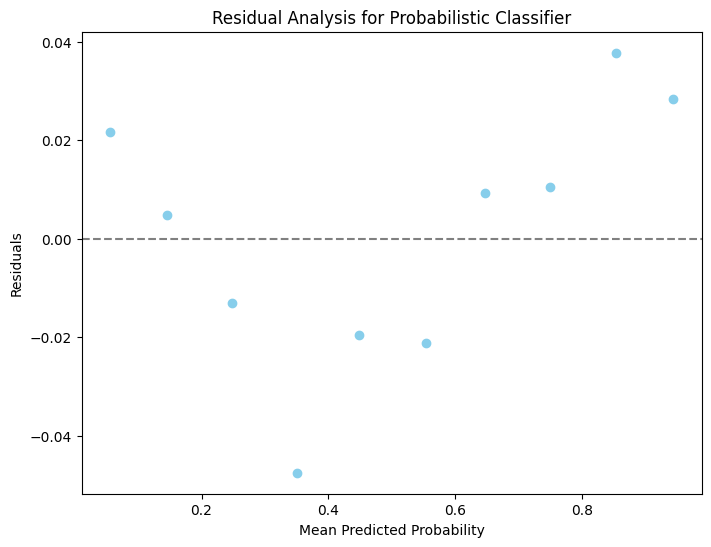

In [ ]:
# Residual Analysis (Probabilistic Classifier):
from sklearn.calibration import calibration_curve

# Residual Analysis for Probabilistic Classifier
prob_true, prob_pred = calibration_curve(y_test, best_logreg.predict_proba(X_test)[:, 1], n_bins=10)

# Calculate residuals
residuals = prob_pred - prob_true

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(prob_pred, residuals, marker='o', color='skyblue')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Analysis for Probabilistic Classifier')
plt.show()
